<a href="https://colab.research.google.com/github/MalihaUCF/Machine-Learning-Course-Assignments--Spring-2019/blob/master/Assignment1/Problem1/Problem1_correct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Clean Space - code



from keras.datasets import mnist
import numpy as np

(train_images,train_labels),(test_images,test_labels)=mnist.load_data()  



print('Training Data Shape',train_images.shape)
print('Test Data Shape',test_images.shape)
print('The train and test labels look like this,' ,train_labels.shape,test_labels.shape)

#modifying class labels
y_new = np.zeros(train_labels.shape)
y_new[np.where(train_labels == 0.0)[0]] = 1
train_labels = y_new

#print(y_train[:,7])
#print(train_labels[0,1])

y_new = np.zeros(test_labels.shape)
y_new[np.where(test_labels == 0.0)[0]] = 1
test_labels = y_new



train_images = train_images.reshape(60000, 28*28) 
test_images = test_images.reshape(10000, 28*28)


train_images = train_images.T 
test_images=test_images.T

 
train_images = train_images.astype('float32') 
test_images = test_images.astype('float32') 
train_images /= 255 
test_images /= 255


print('X-shape-',train_images.shape)
print('Y-shape-',train_labels.shape)

train_labels, test_labels = train_labels.reshape(1,60000),test_labels.reshape(1,10000)

print('Y-reshape-',train_labels.shape)
print('Y-reshape-',test_labels.shape)





Using TensorFlow backend.


11493376/11490434 [==============================] - 3s 0us/step
Training Data Shape (60000, 28, 28)
Test Data Shape (10000, 28, 28)
The train and test labels look like this, (60000,) (10000,)
X-shape- (784, 60000)
Y-shape- (60000,)
Y-reshape- (1, 60000)
Y-reshape- (1, 10000)


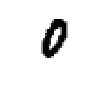

[1.]
[0.]


In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

i = 34
plt.figure(figsize = (1,1))
plt.imshow(train_images[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
print(train_labels[:,i])
print(train_labels[:,8])

In [0]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

  
def compute_loss(Y, Y_hat):   #binary cross entropy

  m = Y.shape[1]
  L = -(1./m) * ( np.sum( np.multiply(np.log(Y_hat),Y) ) + np.sum( np.multiply(np.log(1-Y_hat),(1-Y)) ) )

  return L





In [0]:

def squared_loss(Y,A):   # mean square error
  
  m =  m = Y.shape[1]
  L = np.square(Y - A).mean()
 
    
  return L


In [0]:
def mini_batches(X, Y, batchsize):
    for start_idx in range(0, X.shape[0] - batchsize + 1, batchsize):
        excerpt = slice(start_idx, start_idx + batchsize)
        yield X[excerpt], Y[excerpt]
        
               
        

In [43]:
learning_rate = 1
batch_size=32
costs = []

X = train_images
Y = train_labels

n_x = X.shape[0]
m = X.shape[1]

#W = np.random.randn(n_x, 1) * 0.01
#b = np.zeros((1, 1))

W = np.zeros(shape=(n_x,1))
b = 0
        
for i in range(1000):
  
  
  for batch in mini_batches(X.T, Y.T, batch_size):
    
      x_batch, y_batch = batch
      
      Z = np.matmul(W.T, x_batch.T) + b
      A = sigmoid(Z)
      
      #cost = compute_loss(Y, A)
      cost=squared_loss(y_batch.T,A)  #continue from here

      dW = (1/m) * np.matmul(x_batch.T, (A-y_batch).T)
      db = (1/m) * np.sum(A-y_batch.T, axis=1, keepdims=True)

      W = W - learning_rate * dW
      b = b - learning_rate * db

  costs.append(cost)   
      
  if (i % 100 == 0):
      print("Epoch", i, "cost: ", cost)

     

        
      

        

Epoch 0 cost:  0.07567278984229237
Epoch 100 cost:  0.06467387508976799
Epoch 200 cost:  0.062215853540801086
Epoch 300 cost:  0.06130401233671739
Epoch 400 cost:  0.06093465521256239
Epoch 500 cost:  0.06079048385199266
Epoch 600 cost:  0.060748398940122204
Epoch 700 cost:  0.06075486066672919
Epoch 800 cost:  0.060784646344800616
Epoch 900 cost:  0.06082516971131548


In [0]:
#Test code left only, minibatch and loss fucntion all correct


def accuracy(data, weight, bias):
    m = data.shape[0]
    print(m)
    cnt = 0
    for i in range(m):
        x = data[i, :]
        print(x.shape)
        t = np.dot(weight.T, x) + bias
        #print(t)
        if t.all() > 0:
            if data[i, 0] > 0:
                cnt += 1
        else:
            if data[i, 0] < 0:
                cnt += 1
    return cnt/m * 100
  
#print('Accuarcy on test data is', accuracy(Test_data, finalWeight, finalBias))
  
  

In [2]:
accuracy=accuracy(test_images.T,W,b)


Print('Test accuracy is',accuracy)

NameError: ignored

In [0]:
learning_rate = 1

X = train_images
Y = train_labels

n_x = X.shape[0]
m = X.shape[1]

W = np.random.randn(n_x, 1) * 0.01
b = np.zeros((1, 1))

        
for i in range(1000):
     
    Z = np.matmul(W.T, X) + b
    A = sigmoid(Z)

    #cost = compute_loss(Y, A)
    cost=squared_loss(Y,A)  #continue from here

    dW = (1/m) * np.matmul(X, (A-Y).T)
    db = (1/m) * np.sum(A-Y, axis=1, keepdims=True)

    W = W - learning_rate * dW
    b = b - learning_rate * db

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix


print(W.shape)
print(W)

X=test_images
Y=test_labels

predictions=[]
labels=[]

for batch in mini_batches(X.T, Y.T, batch_size):
  
  x_batch, y_batch = batch
  Z = np.matmul(W.T, x_batch.T) + b
  A = sigmoid(Z)

  prediction = (A>.5)[0,:]
  label = (test_labels == 1)[0,:]
  
  predictions.append(prediction)
  labels.append(label)
  
#print(confusion_matrix(predictions, labels))


print(classification_report(predictions, labels))



In [0]:
def accuracy(data, weight, bias):
    m = data.shape[0]
    
    
    cnt = 0
    for i in range(m):
        x = data[i, 1:]
        
        print(W.shape)
        print(x.shape)
        t = np.dot(weight.T, x) + bias
        if t > 0:
            if data[i, 0] > 0:
                cnt += 1
        else:
            if data[i, 0] < 0:
                cnt += 1
    return cnt/m * 100
  
#print('Accuarcy on test data is', accuracy(Test_data, finalWeight, finalBias))
  
  

In [0]:

accuracy=accuracy(test_images.reshape(1,),W,b)


Print('Test accuracy is',accuracy)

In [0]:
#accuracy code - check


def accuracy(data, weight, bias):
    m = data.shape[0]
    cnt = 0
    for i in range(m):
        x = data[i, 1:]
        t = np.dot(weight.T, x) + bias
        if t > 0:
            if data[i, 0] > 0:
                cnt += 1
        else:
            if data[i, 0] < 0:
                cnt += 1
    return cnt/m * 100
  
print('Accuarcy on test data is', accuracy(Test_data, finalWeight, finalBias))
  
  